In [36]:
import numpy as np
import matplotlib.pyplot as plt

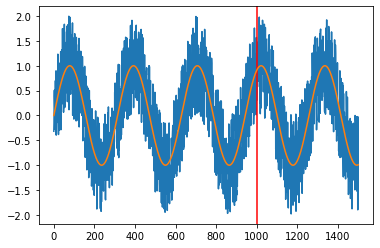

In [63]:
time = np.arange(0,1500)
y_with_noise = np.sin(0.02 * time) + np.random.uniform(low=-1, high=1, size=(1500,))
y_without_noise = np.sin(0.02 * time)
plt.plot(y_with_noise)
plt.axvline(1000, c='r')
plt.plot(y_without_noise)

In [64]:
y = np.sin(0.02 * time) + np.random.uniform(low=-1, high=1, size=(1500,))

In [65]:
# Normalizing the data

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
normalizer = MinMaxScaler(feature_range=(0,1)) # scale 0-1

In [68]:
y.shape # 1D

(1500,)

In [69]:
y = np.reshape(y, (-1,1))

In [70]:
y.shape #2D

(1500, 1)

In [71]:
y_norm = normalizer.fit_transform(y)

In [72]:
y_norm.shape

(1500, 1)

In [73]:
y_norm # all values now lie in scale 0-1

array([[0.52823604],
       [0.58331631],
       [0.48682268],
       ...,
       [0.22269131],
       [0.36524215],
       [0.20854133]])

In [74]:
y[5]

array([-0.88894839])

In [76]:
y_norm[5]

array([0.27209352])

In [77]:
# reverse normalization
normalizer.inverse_transform([[0.27209352]])

array([[-0.8889484]])

In [78]:
y_train = y_norm[0:1000]
y_test = y_norm[1000:]

In [79]:
def prepareDataset(data, step):
    X = []
    y = []
    for i in range(len(data) - step):
        X.append(data[i: i+step])
        y.append(data[i+step])
    return np.array(X), np.array(y)

In [80]:
step=10

In [81]:
trainX, trainY = prepareDataset(y_train, step)

In [82]:
testX, testY = prepareDataset(y_test, step)

In [83]:
print(trainX.shape, trainY.shape)

(990, 10, 1) (990, 1)


In [84]:
print(testX.shape, testY.shape)

(490, 10, 1) (490, 1)


In [85]:
trainX[0]

array([[0.52823604],
       [0.58331631],
       [0.48682268],
       [0.41769389],
       [0.7477088 ],
       [0.27209352],
       [0.69488416],
       [0.73360482],
       [0.44648286],
       [0.75835723]])

In [86]:
trainY[0]

array([0.59932933])

In [87]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN

In [88]:
model = Sequential()

In [89]:
model.add(
    SimpleRNN(units=1, activation='tanh')
)

In [90]:
model.add(
    Dense(units=1, activation='linear')
)

In [91]:
model.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'SimpleRNN',
   'config': {'name': 'simple_rnn_1',
    'trainable': True,
    'dtype': 'float32',
    'return_sequences': False,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 1,
    'activation': 'tanh',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'recurrent_constraint': None,
    'bias_constraint': None,
    'dropout': 0.0,
    'recurrent_dropout': 0.0}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_1',
    'trainable': True,
    'dtype': 'flo

In [92]:
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [93]:
model.fit(x=trainX, y=trainY, epochs=200)

Epoch 1/100
31/31 [==============================] - 2s 2ms/step - loss: 0.0479
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0446
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0438
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0397
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0393
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0390
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0363
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0362
Epoch 9/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0361
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0344
Epoch 11/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0358
Epoch 12/100
31/31 [==============================] - 0s 1ms/step - loss: 0.0339
Epoch 13/100
31/31 [=================

In [94]:
loss = model.history.history['loss']

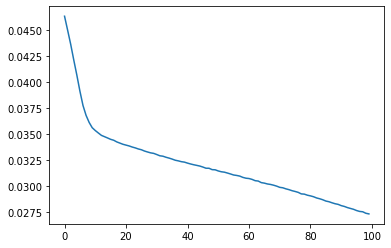

In [95]:
plt.plot(loss)

In [99]:
test_pred = model.predict(testX)
train_pred = model.predict(trainX)

In [100]:
test_pred_revnorm = normalizer.inverse_transform(test_pred)
train_pred_revnorm = normalizer.inverse_transform(train_pred)

In [102]:
predict = np.vstack((train_pred_revnorm, test_pred_revnorm))

In [103]:
predict.shape

(1480, 1)

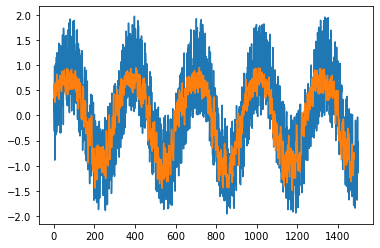

In [107]:
plt.plot(y) # actual 
plt.plot(predict) # prediction